**Part 1: Data Preparation and Exploration**

**Part 2: Model Building - ARIMA**

**Part 3: Model Building - Exponential Smoothing**

**Part 4: Evaluation and Comparison**

In [5]:
# Time series ARIMA is a powerful time series forecasting technique used 
# when data is nonstationary,
#p=lags of actual values,d=to remove trend,q=Number of MA(lags of forecast error)
# AR:AUTO REGRESSIVE
#I=Integrated
# MA=Moving Average
# ARIMA:(Auto regressive Integrated  Moving Average):Stationary model used for time series forecasting
# ARIMA:(p,d,q)
# p=order of the AR COMPONENT(NUMBER OF LAGGED OBSERVATIONS)
# d=degree of differencing needed to make time series stationary
#q:Order of MA(number of lagged forecast errors used in the model)
import pandas as pd
import numpy as np
#ARIMA:AUTOREGRESSIVE INTEGRATED MOVING AVERAGE
# STATISTICAL MODEL:Time series
# ARIMA MODEL(P,D,Q):THESES ARE ASSIGNED TO MODIFY THE MODEL
#P=AUTO REGRESSIVE
#use case:we are using exchange rate, we are anlayzing it using arima model of TIME SERIES

In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\GT-499\Downloads\exchange_rate (1) (1).csv",index_col='date',parse_dates=True)
# standard format(data-month-year)
df

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [ ]:
#

In [3]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


In [4]:
df.shape

(7588, 1)

In [5]:
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

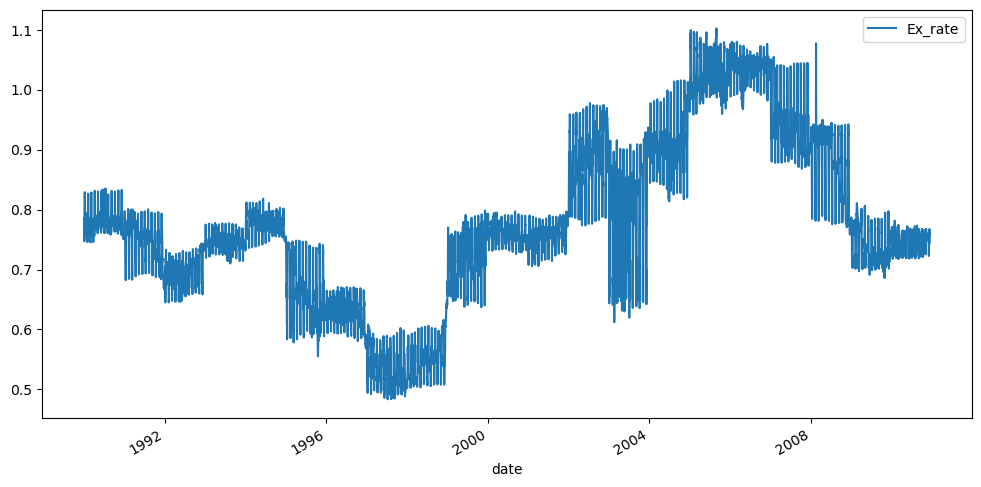

In [6]:
df.plot(figsize=(12,6))
# .plot(line plot)

In [7]:
#

In [25]:
# AUGMENT DICKEY=FULLER TEST:Time series stationary/Nonstationary(Hypothesis Testing)
# Hypothesis Testing ARIMA
#Akaike Information CRITERION(AIC)
# An augmented Dickery
#aic(akaike Information criteria),Lower aic:Better model
# TSA:Time series analysis refers to the techniques used to analyze forecast time based dat
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    
  dftest=adfuller(df['Ex_rate'],autolag='AIC')

  print("1. ADF :",dftest[0])
  print("2. P-value:",dftest[1])
  print("3. Num of Lags",dftest[2])
  print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
  print("5. Critical values:",dftest[4])
  for key, val in dftest[4].items():
      print("\t",key,":",val)

In [9]:
ad_test(df['Ex_rate'])

1. ADF : -1.6649941807381343
2. P-value: 0.44923273535979974
3. Num of Lags 1
4. Num of Observation used for ADF Regression and Critical Values Calculation: 7586
5. Critical values: {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}
	 1% : -3.4312123140180137
	 5% : -2.861921078147796
	 10% : -2.5669728434336108


In [26]:
# if required install 
#!pip install pmdarima
#pmdarima is a python library that automates 
#the process of building ARIMA model(bEST P,D,Q)

In [11]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [12]:
stepwise_fit=auto_arima(df['Ex_rate'],trace=True,suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=5.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=2.86 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=2.65 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=5.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=2.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=2.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=5.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=2.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=0.85 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.316, Time=2.30 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 33.824 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:               SARIMAX(1, 1, 0)   Log Likelihood               28054.159
Date:                Fri, 25 Jul 2025   AIC                         -56104.319
Time:                        10:08:59   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865011.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
df.shape

(7588, 1)

In [15]:
# last 30 rows is removed from training and it is moved to testing
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(7558, 1) (30, 1)


In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model=ARIMA(train['Ex_rate'],order=(1,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7558
Model:                 ARIMA(1, 1, 0)   Log Likelihood               27934.469
Date:                Fri, 25 Jul 2025   AIC                         -55864.938
Time:                        10:09:00   BIC                         -55851.078
Sample:                             0   HQIC                        -55860.180
                               - 7558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1317      0.002    -64.444      0.000      -0.136      -0.128
sigma2      3.604e-05   9.99e-08    360.870      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2846350.67
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

7558    0.744095
7559    0.744155
7560    0.744147
7561    0.744148
7562    0.744148
7563    0.744148
7564    0.744148
7565    0.744148
7566    0.744148
7567    0.744148
7568    0.744148
7569    0.744148
7570    0.744148
7571    0.744148
7572    0.744148
7573    0.744148
7574    0.744148
7575    0.744148
7576    0.744148
7577    0.744148
7578    0.744148
7579    0.744148
7580    0.744148
7581    0.744148
7582    0.744148
7583    0.744148
7584    0.744148
7585    0.744148
7586    0.744148
7587    0.744148
Name: predicted_mean, dtype: float64
date
2010-11-09    0.744095
2010-12-09    0.744155
2010-09-13    0.744147
2010-09-14    0.744148
2010-09-15    0.744148
2010-09-16    0.744148
2010-09-17    0.744148
2010-09-18    0.744148
2010-09-19    0.744148
2010-09-20    0.744148
2010-09-21    0.744148
2010-09-22    0.744148
2010-09-23    0.744148
2010-09-24    0.744148
2010-09-25    0.744148
2010-09-26    0.744148
2010-09-27    0.744148
2010-09-28    0.744148
2010-09-29    0.744148
2010-09-30 

<Axes: xlabel='date'>

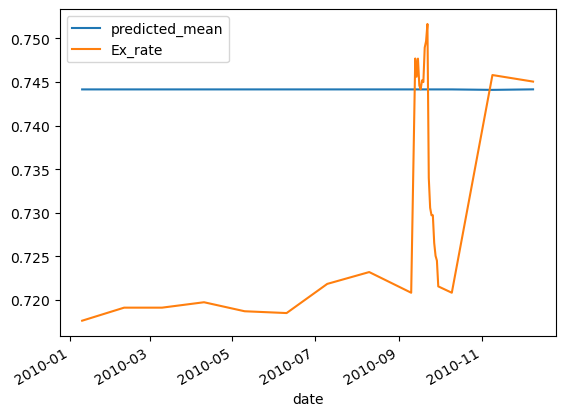

In [19]:
pred.plot(legend=True)
test['Ex_rate'].plot(legend=True)

In [20]:
test['Ex_rate'].mean()

0.732738

In [21]:


from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Ex_rate']))
print(rmse)

0.016634697604867923


In [22]:
model2=ARIMA(df['Ex_rate'],order=(0,0,0))
model2=model2.fit()
df.tail()

,Ex_rate
date,
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197
2010-09-10,0.720825
2010-10-10,0.720825


In [23]:
pred = model2.predict(start=len(df), end=len(df)+30, typ='levels')
pred = pred.rename('ARIMA Predictions')
print(pred)

7588    0.776969
7589    0.776969
7590    0.776969
7591    0.776969
7592    0.776969
7593    0.776969
7594    0.776969
7595    0.776969
7596    0.776969
7597    0.776969
7598    0.776969
7599    0.776969
7600    0.776969
7601    0.776969
7602    0.776969
7603    0.776969
7604    0.776969
7605    0.776969
7606    0.776969
7607    0.776969
7608    0.776969
7609    0.776969
7610    0.776969
7611    0.776969
7612    0.776969
7613    0.776969
7614    0.776969
7615    0.776969
7616    0.776969
7617    0.776969
7618    0.776969
Name: ARIMA Predictions, dtype: float64


<Axes: >

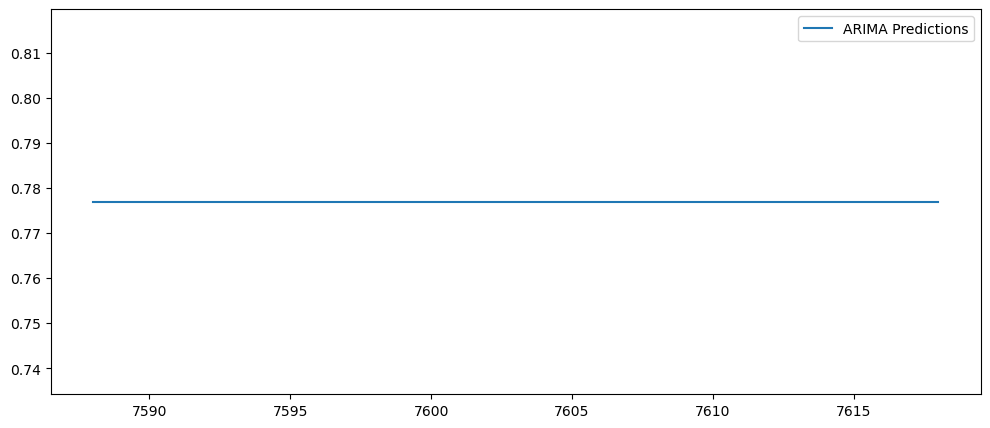

In [24]:
pred.plot(figsize=(12,5),legend=True)